In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import numpy 
import pandas as pd
import tensorflow as tf

In [2]:

from tensorflow.python.keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt

In [3]:
df_pre = pd.read_csv('dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.5)

In [4]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [5]:
seed = 0
numpy.random.seed(0)
tf.random.set_seed(3)

df_pre = pd.read_csv('dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, \
                              monitor='val_loss', verbose=1, save_best_only=True)

Epoch 1/3500
9/9 [==============================] - 0s 18ms/step - loss: 1.1441 - accuracy: 0.7394 - val_loss: 0.7596 - val_accuracy: 0.5655
Epoch 2/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.5780 - accuracy: 0.7029 - val_loss: 0.4728 - val_accuracy: 0.7664
Epoch 3/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.7693 - val_loss: 0.3818 - val_accuracy: 0.8289
Epoch 4/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8385 - val_loss: 0.3156 - val_accuracy: 0.8713
Epoch 5/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.3385 - accuracy: 0.8780 - val_loss: 0.2857 - val_accuracy: 0.9063
Epoch 6/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.3060 - accuracy: 0.9056 - val_loss: 0.2592 - val_accuracy: 0.9170
Epoch 7/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.9102 - val_loss: 0.2442 - val_accuracy: 0.9231
Epoch 8/3500
9/9 [=

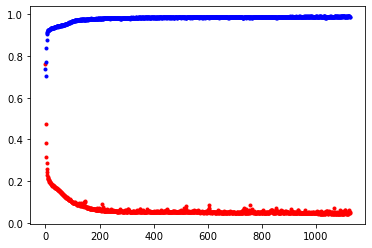

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = \
            EarlyStopping(monitor='val_loss',patience=100)

history = model.fit(X,Y, epochs=3500, batch_size=500 , validation_split=0.33,  callbacks=[early_stopping_callback])

print("\n Accuracy: %.4f" % (model.evaluate(X,Y)[1]))

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss,'o',c='red',markersize=3)
plt.plot(x_len, y_acc,'o',c='blue',markersize=3)
plt.show()